# Using joblib


In Python, there are also other third-party packages that can make the parallel computing easier, especially for some daily tasks.

**joblib** is one of them, it provides an easy simple way to do parallel computing (it has many other usages as well). 


#### See documentation:

https://joblib.readthedocs.io/en/latest/index.html

First you need to install it by running 

```python
conda install joblib
```

Or:

```python
pip install joblib
```

Let's see how can we run the previous example using this new package. 


### joblib classes and functions for parallelisation:


The **Parallel** is a helper class that essentially provides a convenient interface for the **multiprocessing** module we saw before. **Parallel:** creates the object responsible for managing the parallel execution. The Parallel object receives this sequence of "delayed" objects.

The **delayed** is used to capture the arguments of the target function, in this case, the **random_square**. We run the above code with 2 cores. **delayed:** acts as a function decorator, which transforms a function call into a "lazy object" deferring their execution until later. It avoids unnecessary computations until they are actually needed. The generator expression (delayed(matrix_op.matrix_op)(i) for i in range(1000000)) creates a sequence of these "delayed" objects.


### Notes on usage:

If you want to use all of the computational power on your machine. You can use all cores on your machine by setting *n\_jobs=-1*.


If you set it to -2, all CPUs but one are used. 


Besides, you can turn on the **verbose** argument to output the status messages. 

In [1]:
# Import 
from joblib import Parallel, delayed, cpu_count
import numpy as np
import time
import random_square

In [2]:
n_cpu = cpu_count()

print(f"Number of CPU cores: {n_cpu}")

Number of CPU cores: 14


### Runnning on 1 core:

In [3]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 1)(delayed(matrix_op.matrix_op)(i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

NameError: name 'matrix_op' is not defined

### Runnning on 2 cores:

In [ ]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 2)(delayed(matrix_op.matrix_op)(i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

### Runnning on 4 cores:

In [ ]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 4)(delayed(matrix_op.matrix_op)(i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

### Runnning on all CPU cores:

In [ ]:
# Get cpu cores:
n_cpu = cpu_count()

# Time stamp
start = time.time()

# Call joblib
Parallel(n_jobs = n_cpu)(delayed(matrix_op.matrix_op)(i) for i in range(1000000))

# Time stamp
end = time.time()

# Print execution
print(end - start)

## Visualise the execution time for different number of CPU cores:

Let's visualise the execution time changes versus the number of data points using both the serial and parallel version.

We will see that until certain point, it is better to use the serial version. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(matrix_op.matrix_op(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call joblib
    Parallel(n_jobs = n_cpu)(delayed(matrix_op.matrix_op)(i) for i in range(n))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

### Running on all the CPU cores:

In [ ]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = cpu_count()
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

In [ ]:
plt.figure(figsize = (11, 3))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

In [ ]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = 4
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

In [ ]:
plt.figure(figsize = (11, 3))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

## Running multiprocessing tests on the HPC Cedia Cluster

The script below should be edited/scp into the HPC Cedia Cluster to test parallelisation performance there. The script returns a figure and also the data to make the figure in a CSV file.


### Python Script:

```bash
vim test_jl.py
```

```Python
"""
Script to compute execution times.
"""
# Import libraries
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import random_square

# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(matrix_op.matrix_op(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call joblib
    Parallel(n_jobs = n_cpu)(delayed(matrix_op.matrix_op)(i) for i in range(n))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

# Call functions for each n_run[i]

t_serial = np.array([serial(int(n)) for n in n_run])

t_parallel_n02 = np.array([parallel(int(n), 2) for n in n_run])
t_parallel_n04 = np.array([parallel(int(n), 4) for n in n_run])
t_parallel_n08 = np.array([parallel(int(n), 8) for n in n_run])
t_parallel_n16 = np.array([parallel(int(n), 16) for n in n_run])

# Plotting
plt.figure(figsize = (9, 5))

plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel_n02, '-o', color = "green", label = 'parallel: n=2')
plt.plot(n_run, t_parallel_n04, '-o', color = "blue", label = 'parallel: n=4')
plt.plot(n_run, t_parallel_n08, '-o', color = "magenta", label = 'parallel: n=8')
plt.plot(n_run, t_parallel_n16, '-o', color = "brown", label = 'parallel: n=16')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.savefig("hpc_cedia_jl.png")
plt.close()

# Saving execution data in a CSV file
with open("hpc_cedia_jl.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Header row
    writer.writerow(["n_run", "serial", "parallel_2", "parallel_4", "parallel_8", "parallel_16"])
    # Data row
    for j in range(len(n_run)):
        writer.writerow([n_run[j], t_serial[j], t_parallel_n02[j], t_parallel_n04[j],\
                       t_parallel_n08[j], t_parallel_n16[j]])
```



### Batch script:

Adjust the resources as needed:

```bash
vim job_jl.py
```

```bash
#!/bin/bash
#SBATCH --job-name=job_jl
#SBATCH --partition=cpu
#SBATCH --time=00:05:00
#SBATCH --cpus-per-task=16
#SBATCH --mem=1G
#SBATCH --output=job_jl.out
#SBATCH --error=job_jl.err

# Your commands go here
source ~/.bashrc
conda activate py310
python test_jl.py
```

### Batch job submission:
```bash
sbatch job_jl.py
```

### Results:
The figure I obtained can be seen here:

https://github.com/wbandabarragan/computational-physics-2/blob/main/unit-3/hpc_cedia_jl.png

There is not much some speed gain in distributing the tasks among more CPU cores. The problem is too small.

Alternatively, we can also look at the CSV file and plot locally.

In [ ]:
import pandas as pd

In [ ]:
# Read execution data
df = pd.read_csv("./hpc_cedia_jl.csv")
#print(df)

n_run = np.array(df["n_run"])
t_serial = np.array(df["serial"])
t_parallel_n02 = np.array(df["parallel_2"])
t_parallel_n04 = np.array(df["parallel_4"])
t_parallel_n08 = np.array(df["parallel_8"])
t_parallel_n16 = np.array(df["parallel_16"])

# Plotting
plt.figure(figsize = (11, 3))
plt.title("HPC Cedia Parallelisation: JobLib")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel_n02, '-o', color = "green", label = 'parallel: n=2')
plt.plot(n_run, t_parallel_n04, '-o', color = "blue", label = 'parallel: n=4')
plt.plot(n_run, t_parallel_n08, '-o', color = "magenta", label = 'parallel: n=8')
plt.plot(n_run, t_parallel_n16, '-o', color = "brown", label = 'parallel: n=16')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()


## Joblib Backends

There are multiple backends in **joblib**, which means using different ways to do the parallel computing:

### 1. loky (Default Backend):

- loky is the default backend for joblib.
- loky is good at handling large NumPy arrays and complex data structures.


### 2. multiprocessing:

- You can explicitly tell joblib to use the standard Python multiprocessing module.

- This can be helpful if you need to use features that are specific to multiprocessing.


### 3. threading:

- joblib can also use threads for parallel execution. It can be useful for I/O-bound tasks, where threads can release the GIL while waiting for I/O operations.

- This is generally not recommended for CPU-bound tasks, as Python's Global Interpreter Lock (GIL) prevents true parallelism in CPU-bound Python threads.


In [ ]:
# Example using loky (default)
start = time.time()
results_loky = Parallel(n_jobs=4, backend='loky')(delayed(matrix_op.matrix_op)(i) for i in range(1000000))
end = time.time()
print("Loky time is: ", end - start)

# Example using multiprocessing
start = time.time()
results_mp = Parallel(n_jobs=4, backend='multiprocessing')(delayed(matrix_op.matrix_op)(i) for i in range(1000000))
end = time.time()
print("Multiprocessing time is: ", end - start)

# Example using threading -> Very bad performance
start = time.time()
results_threading = Parallel(n_jobs=4, backend='threading')(delayed(matrix_op.matrix_op)(i) for i in range(1000000))
end = time.time()
print("Threading time is: ", end - start)

## Example: Matrix multiplication

In [7]:
# Import our new module
import matrix_op 

In [8]:
# Start time stamp
start = time.time()

# Empty list to store the output matrices
mat_out = []

# Call our module
for j in range(100000):
    mat_out.append(matrix_op.matrix_op(j))
    
# End time stamp
end = time.time()

In [9]:
print(f"Execution time on 1 processor is: {end-start}")

Execution time on 1 processor is: 0.7368719577789307


### Run with multiprocessing:

In [14]:
import multiprocessing as mp
import matplotlib.pyplot as plt

In [15]:
# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(matrix_op.matrix_op(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call multiprocessing Pool -> Create processes
    pool = mp.Pool(processes=n_cpu)

    # Allocate tasks into the pool
    results = [pool.map(matrix_op.matrix_op, range(n))]

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time


In [20]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = 4
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])


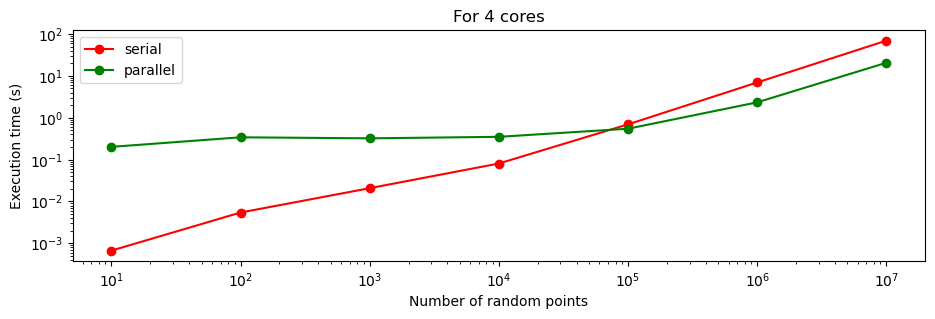

In [21]:
plt.figure(figsize = (11, 3))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()